# Анализ бизнес-показетелей развлекательного приложения Procrastinate Pro+
Несмотря на огромные вложения в рекламу, последние несколько месяцев компания терпит убытки. Задача анализа — разобраться в причинах и помочь компании выйти в плюс.
Есть данные о пользователях, привлечённых с 1 мая по 27 октября 2019 года:
* лог сервера с данными об их посещениях,
* выгрузка их покупок за этот период,
* рекламные расходы.
Структура visits_info_short.csv:
* `User Id` — уникальный идентификатор пользователя,
* `Region` — страна пользователя,
* `Device` — тип устройства пользователя,
* `Channel` — идентификатор источника перехода,
* `Session Start` — дата и время начала сессии,
* `Session End` — дата и время окончания сессии.
Структура orders_info_short.csv:
* `User Id` — уникальный идентификатор пользователя,
* `Event Dt` — дата и время покупки,
* `Revenue` — сумма заказа.
Структура costs_info_short.csv:
* `dt` — дата проведения рекламной кампании,
* `Channel` — идентификатор рекламного источника,
* `costs` — расходы на эту кампанию.

# План работы
* Загрузите данные о визитах, заказах и рекламных расходах из CSV-файлов в переменные.
* Изучить данные и выполнить предобработку. Опредлить есть ли в данных пропуски и дубликаты? Убедиться, что типы данных во всех колонках соответствуют сохранённым в них значениям.

*Задать функции для расчёта и анализа LTV, ROI, удержания и конверсии.*

Это функции для вычисления значений метрик:
* `get_profiles()` — для создания профилей пользователей,
* `get_retention()` — для подсчёта Retention Rate,
* `get_conversion()` — для подсчёта конверсии,
* `get_ltv()` — для подсчёта LTV.
А также функции для построения графиков:
* `filter_data()` — для сглаживания данных,
* `plot_retention()` — для построения графика Retention Rate,
* `plot_conversion()` — для построения графика конверсии,
* `plot_ltv_roi` — для визуализации LTV и ROI.

*Исследовательский анализ данных*
* Составить профили пользователей. Определите минимальную и максимальную даты привлечения пользователей.
* Выяснить, из каких стран пользователи приходят в приложение и на какую страну приходится больше всего платящих пользователей. Построить таблицу, отражающую количество пользователей и долю платящих из каждой страны.
* Узнать, какими устройствами пользуются клиенты и какие устройства предпочитают платящие пользователи. Построить таблицу, отражающую количество пользователей и долю платящих для каждого устройства.
* Изучить рекламные источники привлечения и определите каналы, из которых пришло больше всего платящих пользователей. * Построить таблицу, отражающую количество пользователей и долю платящих для каждого канала привлечения.

*Маркетинг*
* Посчитать общую сумму расходов на маркетинг.
* Выяснить, как траты распределены по рекламным источникам, то есть сколько денег потратили на каждый источник.
* Построить график с визуализацией динамики изменения расходов во времени по неделям по каждому источнику. Затем на другом графике визуализировать динамику изменения расходов во времени по месяцам по каждому источнику.
* Узнайть, сколько в среднем стоило привлечение одного пользователя (CAC) из каждого источника.

*Оцените окупаемость рекламы* 
Используя графики LTV, ROI и CAC, проанализировать окупаемость рекламы. Будем считать, что на календаре 1 ноября 2019 года, а в бизнес-плане заложено, что пользователи должны окупаться не позднее чем через две недели после привлечения.

*Написать выводы*
* Выделить причины неэффективности привлечения пользователей.
* Сформулировать рекомендации для отдела маркетинга.

### Загрузка данных и подготовка их к анализу

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import datetime
import math
from datetime import date, datetime, timedelta

In [2]:
visit = pd.read_csv('/datasets/visits_info_short.csv')
order = pd.read_csv('/datasets/orders_info_short.csv')
cost = pd.read_csv('/datasets/costs_info_short.csv')

In [3]:
def information(df):
    duplicates=df.duplicated().sum()
    isnull=df.isnull().sum()
    return df.info(),df.head(), print('\033[1m' + 'Количество дубликатов в таблице:' + '\033[0m',duplicates),print('\033[1m' + 'Количество пропущенных значений в таблице:' + '\033[0m',isnull)

In [4]:
information(visit)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   User Id        309901 non-null  int64 
 1   Region         309901 non-null  object
 2   Device         309901 non-null  object
 3   Channel        309901 non-null  object
 4   Session Start  309901 non-null  object
 5   Session End    309901 non-null  object
dtypes: int64(1), object(5)
memory usage: 14.2+ MB
Количество дубликатов в таблице: 0
Количество пропущенных значений в таблице: User Id          0
Region           0
Device           0
Channel          0
Session Start    0
Session End      0
dtype: int64


(None,
         User Id         Region   Device  Channel        Session Start  \
 0  981449118918  United States   iPhone  organic  2019-05-01 02:36:01   
 1  278965908054  United States   iPhone  organic  2019-05-01 04:46:31   
 2  590706206550  United States      Mac  organic  2019-05-01 14:09:25   
 3  326433527971  United States  Android   TipTop  2019-05-01 00:29:59   
 4  349773784594  United States      Mac  organic  2019-05-01 03:33:35   
 
            Session End  
 0  2019-05-01 02:45:01  
 1  2019-05-01 04:47:35  
 2  2019-05-01 15:32:08  
 3  2019-05-01 00:54:25  
 4  2019-05-01 03:57:40  ,
 None,
 None)

In [5]:
visit.columns = ['user_id', 'region', 'device', 'channel', 'session_start', 'session_end']

In [6]:
visit['session_start'] = pd.to_datetime(visit['session_start'])
visit['session_end'] = pd.to_datetime(visit['session_end'])

In [7]:
information(order)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   User Id   40212 non-null  int64  
 1   Event Dt  40212 non-null  object 
 2   Revenue   40212 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 942.6+ KB
Количество дубликатов в таблице: 0
Количество пропущенных значений в таблице: User Id     0
Event Dt    0
Revenue     0
dtype: int64


(None,
         User Id             Event Dt  Revenue
 0  188246423999  2019-05-01 23:09:52     4.99
 1  174361394180  2019-05-01 12:24:04     4.99
 2  529610067795  2019-05-01 11:34:04     4.99
 3  319939546352  2019-05-01 15:34:40     4.99
 4  366000285810  2019-05-01 13:59:51     4.99,
 None,
 None)

In [8]:
order.columns = ['user_id', 'event_dt', 'revenue']

In [9]:
order['event_dt'] = pd.to_datetime(order['event_dt'])

In [10]:
information(cost)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt       1800 non-null   object 
 1   Channel  1800 non-null   object 
 2   costs    1800 non-null   float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB
Количество дубликатов в таблице: 0
Количество пропущенных значений в таблице: dt         0
Channel    0
costs      0
dtype: int64


(None,
            dt   Channel  costs
 0  2019-05-01  FaceBoom  113.3
 1  2019-05-02  FaceBoom   78.1
 2  2019-05-03  FaceBoom   85.8
 3  2019-05-04  FaceBoom  136.4
 4  2019-05-05  FaceBoom  122.1,
 None,
 None)

In [11]:
cost.columns = ['dt', 'channel', 'costs']

In [12]:
cost['dt'] = pd.to_datetime(cost['dt'])

 *Промежуточный вывод*
* Типы данных даты во всех датафреймах привели к типу datetime
* Явных дубликатов и пропущенных знаечний ни в одном из датафреймов не обнаружено
* Названия столбцов в каждом датафрейме приведены к общему стилю

### Зададим функции для расчёта и анализа LTV, ROI, удержания и конверсии.

Это функции для вычисления значений метрик:

- `get_profiles()` — для создания профилей пользователей,
- `get_retention()` — для подсчёта Retention Rate,
- `get_conversion()` — для подсчёта конверсии,
- `get_ltv()` — для подсчёта LTV.

А также функции для построения графиков:

- `filter_data()` — для сглаживания данных,
- `plot_retention()` — для построения графика Retention Rate,
- `plot_conversion()` — для построения графика конверсии,
- `plot_ltv_roi` — для визуализации LTV и ROI.

In [13]:
def get_profiles(sessions, orders, ad_costs):

    profiles = (
        sessions.sort_values(by=['user_id', 'session_start'])
        .groupby('user_id')
        .agg(
            {
                'session_start': 'first',
                'channel': 'first',
                'device': 'first',
                'region': 'first',
            }
        )
        .rename(columns={'session_start': 'first_ts'})
        .reset_index()
    )

    profiles['dt'] = profiles['first_ts'].dt.date
    profiles['dt'] = pd.to_datetime(profiles['dt'], format="%Y-%m-%d")
    profiles['month'] = profiles['first_ts'].astype('datetime64[M]')

    profiles['payer'] = profiles['user_id'].isin(orders['user_id'].unique())

    new_users = (
        profiles.groupby(['dt', 'channel'])
        .agg({'user_id': 'nunique'})
        .rename(columns={'user_id': 'unique_users'})
        .reset_index()
    )

    ad_costs = ad_costs.merge(new_users, on=['dt', 'channel'], how='left')

    ad_costs['acquisition_cost'] = ad_costs['costs'] / ad_costs['unique_users']

    profiles = profiles.merge(
        ad_costs[['dt', 'channel', 'acquisition_cost']],
        on=['dt', 'channel'],
        how='left',
    )

    profiles['acquisition_cost'] = profiles['acquisition_cost'].fillna(0)

    return profiles

In [14]:
def get_retention(
    profiles,
    sessions,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    dimensions = ['payer'] + dimensions

    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    result_raw = result_raw.merge(
        sessions[['user_id', 'session_start']], on='user_id', how='left'
    )
    result_raw['lifetime'] = (
        result_raw['session_start'] - result_raw['first_ts']
    ).dt.days
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    return result_raw, result_grouped, result_in_time 

In [15]:
def get_conversion(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    first_purchases = (
        purchases.sort_values(by=['user_id', 'event_dt'])
        .groupby('user_id')
        .agg({'event_dt': 'first'})
        .reset_index()
    )

    result_raw = result_raw.merge(
        first_purchases[['user_id', 'event_dt']], on='user_id', how='left'
    )

    
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days

    
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users' 
        dimensions = dimensions + ['cohort']
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        result = result.fillna(0).cumsum(axis = 1)
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    
    if 'cohort' in dimensions: 
        dimensions = []

    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    return result_raw, result_grouped, result_in_time 

In [16]:
def get_ltv(
    profiles,  
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')
    result_raw = result_raw.merge(
        purchases[['user_id', 'event_dt', 'revenue']],
        on='user_id',
        how='left',
    )

    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days

    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims,
            columns='lifetime',
            values='revenue',
            aggfunc='sum',
        )
        result = result.fillna(0).cumsum(axis=1)
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        cac = df[['user_id', 'acquisition_cost'] + dims].drop_duplicates()
        cac = (
            cac.groupby(dims)
            .agg({'acquisition_cost': 'mean'})
            .rename(columns={'acquisition_cost': 'cac'})
        )
        roi = result.div(cac['cac'], axis=0)
        roi = roi[~roi['cohort_size'].isin([np.inf])]
        roi['cohort_size'] = cohort_sizes

        roi['cac'] = cac['cac']
        roi = roi[['cohort_size', 'cac'] + list(range(horizon_days))]

        return result, roi

    result_grouped, roi_grouped = group_by_dimensions(
        result_raw, dimensions, horizon_days
    )

    if 'cohort' in dimensions:
        dimensions = []

    result_in_time, roi_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    return result_raw, result_grouped, result_in_time, roi_grouped, roi_in_time

In [17]:
def filter_data(df, window):
    for column in df.columns.values:
        df[column] = df[column].rolling(window).mean() 
    return df 

In [18]:
def plot_retention(retention, retention_history, horizon, window=7):

    plt.figure(figsize=(15, 10))

    retention = retention.drop(columns=['cohort_size', 0])

    retention_history = retention_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    if retention.index.nlevels == 1:
        retention['cohort'] = 'All users'
        retention = retention.reset_index().set_index(['cohort', 'payer'])

    ax1 = plt.subplot(2, 2, 1)
    retention.query('payer == True').droplevel('payer').T.plot(
        grid=True, ax=ax1
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание платящих пользователей')

    ax2 = plt.subplot(2, 2, 2, sharey=ax1)
    retention.query('payer == False').droplevel('payer').T.plot(
        grid=True, ax=ax2
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание неплатящих пользователей')

    ax3 = plt.subplot(2, 2, 3)
    columns = [
        name
        for name in retention_history.index.names
        if name not in ['dt', 'payer']
    ]
    filtered_data = retention_history.query('payer == True').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания платящих пользователей'.format(
            horizon
        )
    )

    ax4 = plt.subplot(2, 2, 4, sharey=ax3)

    filtered_data = retention_history.query('payer == False').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax4)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания неплатящих пользователей'.format(
            horizon
        )
    )
    
    plt.tight_layout()
    plt.show() 

In [19]:
def plot_conversion(conversion, conversion_history, horizon, window=7):

    plt.figure(figsize=(15, 5))

    conversion = conversion.drop(columns=['cohort_size'])
    conversion_history = conversion_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    ax1 = plt.subplot(1, 2, 1)
    conversion.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Конверсия пользователей')

    ax2 = plt.subplot(1, 2, 2, sharey=ax1)
    columns = [
        name for name in conversion_history.index.names if name not in ['dt']
    ]
    filtered_data = conversion_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика конверсии пользователей'.format(horizon))

    plt.tight_layout()
    plt.show() 

In [20]:
def plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon, window=7):

    plt.figure(figsize=(20, 10))

    ltv = ltv.drop(columns=['cohort_size'])
    ltv_history = ltv_history.drop(columns=['cohort_size'])[[horizon - 1]]

    cac_history = roi_history[['cac']]
    roi = roi.drop(columns=['cohort_size', 'cac'])
    roi_history = roi_history.drop(columns=['cohort_size', 'cac'])[
        [horizon - 1]
    ]

    ax1 = plt.subplot(2, 3, 1)
    ltv.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('LTV')

    ax2 = plt.subplot(2, 3, 2, sharey=ax1)

    columns = [name for name in ltv_history.index.names if name not in ['dt']]
    filtered_data = ltv_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика LTV пользователей на {}-й день'.format(horizon))

    ax3 = plt.subplot(2, 3, 3, sharey=ax1)
    columns = [name for name in cac_history.index.names if name not in ['dt']]
    filtered_data = cac_history.pivot_table(
        index='dt', columns=columns, values='cac', aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика стоимости привлечения пользователей')
    ax4 = plt.subplot(2, 3, 4)
    roi.T.plot(grid=True, ax=ax4)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('ROI')
    ax5 = plt.subplot(2, 3, 5, sharey=ax4)
    columns = [name for name in roi_history.index.names if name not in ['dt']]
    filtered_data = roi_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax5)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.xlabel('Дата привлечения')
    plt.title('Динамика ROI пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show() 

### Исследовательский анализ данных

In [21]:
profiles = get_profiles(visit, order, cost)

In [22]:
profiles.head()

,user_id,first_ts,channel,device,region,dt,month,payer,acquisition_cost
0,599326,2019-05-07 20:58:57,FaceBoom,Mac,United States,2019-05-07,2019-05-01,True,1.088172
1,4919697,2019-07-09 12:46:07,FaceBoom,iPhone,United States,2019-07-09,2019-07-01,False,1.107237
2,6085896,2019-10-01 09:58:33,organic,iPhone,France,2019-10-01,2019-10-01,False,0.000000
3,22593348,2019-08-22 21:35:48,AdNonSense,PC,Germany,2019-08-22,2019-08-01,False,0.988235
4,31989216,2019-10-02 00:07:44,YRabbit,iPhone,United States,2019-10-02,2019-10-01,False,0.230769


In [23]:
min_analysis_date = profiles['dt'].min()
max_analysis_date = profiles['dt'].max() 
display('Минимальная дата привлечения пользователей', min_analysis_date)
display('Максимальная дата привлечения пользователей', max_analysis_date)

'Минимальная дата привлечения пользователей'

Timestamp('2019-05-01 00:00:00')

'Максимальная дата привлечения пользователей'

Timestamp('2019-10-27 00:00:00')

Предоставленные данные соответствуют описанию-"Есть данные о пользователях, привлечённых с 1 мая по 27 октября 2019 года".

In [24]:
def payer_percentage(dataframio,indexio):
    data = pd.DataFrame(dataframio.pivot_table(index=indexio,
                                               values='user_id',
                                               aggfunc='count'))
    data_payer = pd.DataFrame(dataframio.loc[dataframio['payer'] == True].pivot_table(index=indexio,
                                                                                      values='user_id',
                                                                                      aggfunc='count'))
    data_all = pd.merge(data,data_payer, on=indexio)
    data_all['percent'] = ((data_all['user_id_y'] / data_all['user_id_x'])* 100)
    data_all.rename(columns = {'user_id_x' : 'user_count','user_id_y' : 'payer_count'}, inplace = True)
    return data_all.sort_values(by='percent', ascending=False).style.format({'percent': '{:.1f}%'})
    

In [25]:
payer_percentage(profiles,'region')

,user_count,payer_count,percent
region,,,
United States,100002,6902,6.9%
Germany,14981,616,4.1%
UK,17575,700,4.0%
France,17450,663,3.8%


*Больше всего платящих пользователей приходится на United States*

In [26]:
payer_percentage(profiles,'device')

,user_count,payer_count,percent
device,,,
Mac,30042,1912,6.4%
iPhone,54479,3382,6.2%
Android,35032,2050,5.9%
PC,30455,1537,5.0%


*Большинство платящих пользователей в качестве платформы исапользуют продукцию корпорации Apple,а именно Mac и Iphone.*

In [27]:
payer_percentage(profiles,'channel')

,user_count,payer_count,percent
channel,,,
FaceBoom,29144,3557,12.2%
AdNonSense,3880,440,11.3%
lambdaMediaAds,2149,225,10.5%
TipTop,19561,1878,9.6%
RocketSuperAds,4448,352,7.9%
WahooNetBanner,8553,453,5.3%
YRabbit,4312,165,3.8%
MediaTornado,4364,156,3.6%
LeapBob,8553,262,3.1%


*Больше всего платящих пользователей пришло через каналы: FaceBoom, AdNonSense, lambdaMediaAds, TipTop.*

### Маркетинг

- Посчитайте общую сумму расходов на маркетинг.
- Выясните, как траты распределены по рекламным источникам, то есть сколько денег потратили на каждый источник.
- Постройте график с визуализацией динамики изменения расходов во времени по неделям по каждому источнику. Затем на другом графике визуализируйте динамику изменения расходов во времени по месяцам по каждому источнику.
- Узнайте, сколько в среднем стоило привлечение одного пользователя (CAC) из каждого источника. Используйте профили пользователей.

Напишите промежуточные выводы.

In [28]:
cost['costs'].sum().round()

105497.0

*Общая сумма расходов на маркетинг: 105497*

In [29]:
channel_cost=cost.groupby('channel').sum().sort_values(by='costs', ascending=False)
channel_cost['percent']= channel_cost['costs']/(channel_cost['costs'].sum())*100
channel_cost.sort_values(by='percent', ascending=False).style.format({'costs':'{:.1f}','percent': '{:.1f}%'})

,costs,percent
channel,,
TipTop,54751.3,51.9%
FaceBoom,32445.6,30.8%
WahooNetBanner,5151.0,4.9%
AdNonSense,3911.2,3.7%
OppleCreativeMedia,2151.2,2.0%
RocketSuperAds,1833.0,1.7%
LeapBob,1797.6,1.7%
lambdaMediaAds,1557.6,1.5%
MediaTornado,954.5,0.9%


*Больше всего было потрачено на маркетинг в каналах TipTop и FaceBoom. На них приходится больше 82% всех затрат.*

In [30]:
def cost_period(periodio,annotation,perio):
    data = cost.pivot_table(index=periodio, columns='channel', values='costs', aggfunc='sum')
    data.plot(figsize=(12, 10),grid=True,)
    plt.title('{} график изменения затрат в разбивке по каналам'.format(annotation))
    plt.xlabel(perio)
    plt.ylabel('Затраты')
    plt.show()
    return

In [31]:
cost['week']=cost['dt'].dt.isocalendar().week 
cost['month']=cost['dt'].dt.month

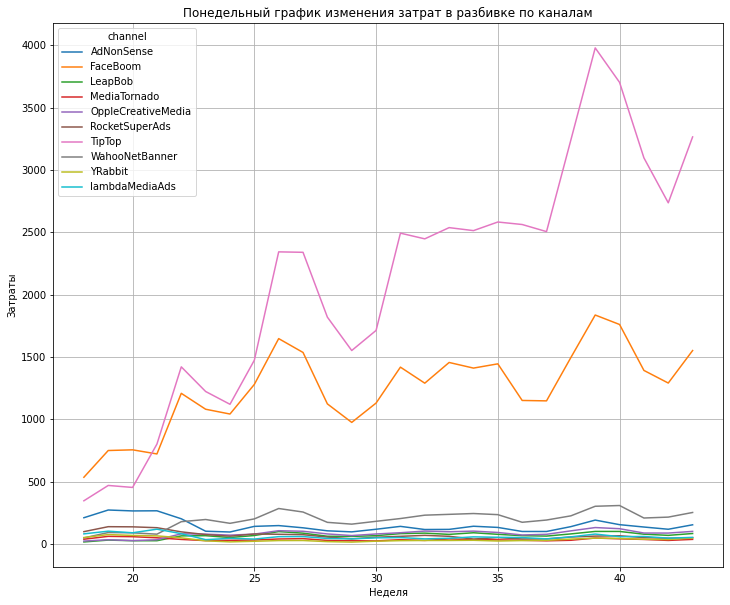

In [32]:
cost_period('week','Понедельный','Неделя')

По всем каналам рекламы за исключением TipTop и FaceBoom, стоимость привлечения держалась примерно на одном уровне,за исключение непольщого польема на 25-27 и 37-41 неделях.
На каналах TipTop и FaceBoom стоимость привлечения росла с каждой неделей, с наибольшими пиками на 24,27 и достигщей своего максимума на 37 неделе.

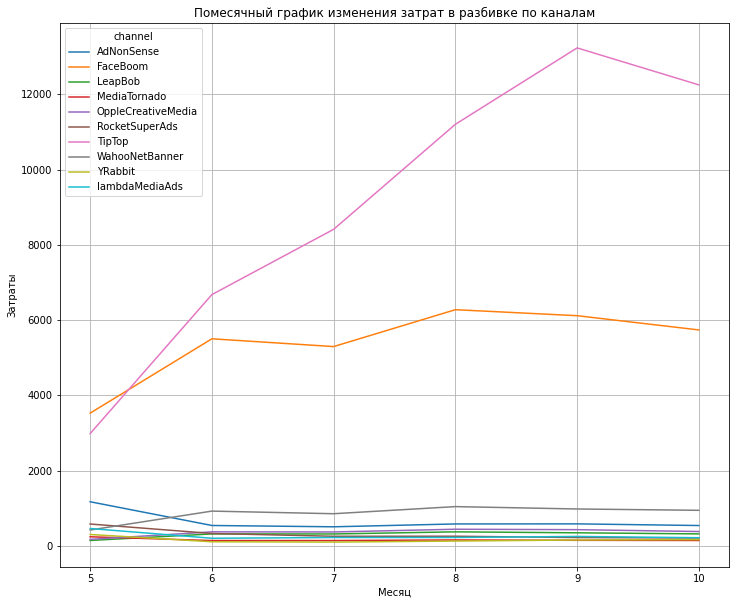

In [33]:
cost_period('month','Помесячный','Месяц')

В помесячной разбивке наблюдается такая же динамика для каналов TipTop(максимум количества затрат в сентябре) и FaceBoom( в августе).Для остальных же каналов рекламы количество вложенных средств держится на оодном уровне,за исключнием небольшой рокировки по показателям для AdNoNSense-WahooNetBanner в середине мая.

In [34]:
profiles.query('channel != "organic"').pivot_table(index='channel',
                                                   values='acquisition_cost',
                                                   aggfunc='mean').sort_values(by='acquisition_cost', ascending=False).style.format({'acquisition_cost': '{:.2f}'})

,acquisition_cost
channel,
TipTop,2.80
FaceBoom,1.11
AdNonSense,1.01
lambdaMediaAds,0.72
WahooNetBanner,0.60
RocketSuperAds,0.41
OppleCreativeMedia,0.25
YRabbit,0.22
MediaTornado,0.22


*Промежуточные выводы*
* Самый неприбыльный и затратный канал TipTop- требуется сократить затраты на него.На втором месте FaceBoom,затраты на который тоже стоило бы урезать.
* Обратить внимание на каналы LeapBob, MediaTornado, YRabbit, OppleCreativeMedia. Привлечение пользователей с этих каналов обходится дешевле всего

### Оценка окупаемость рекламы

In [35]:
observation_date = datetime(2019, 11, 1).date()
horizon_days = 14
profiles = profiles.query('channel != "organic"')

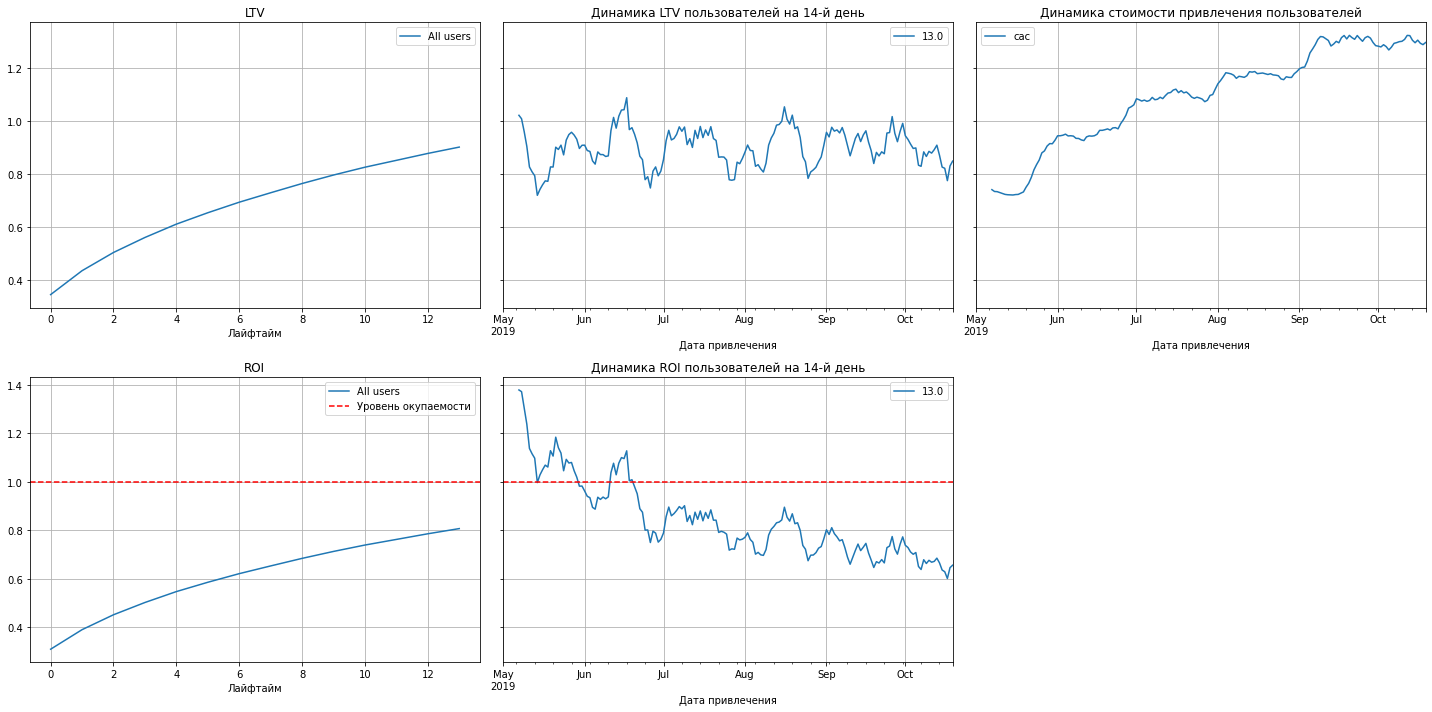

In [36]:
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(profiles, order, observation_date, horizon_days)
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days) 

*Вывод по графикам общей окупаемости рекламы:*
* LTV на протяжении всего лайфтайма растёт, а на 14 день держится на примерно одном уровне на протяжении всего эксперимента
* CAC на протяжении всего эксперимента растёт
* ROI не доходит до уровня окупаемости.
* Пользователи перестают окупаться уже в конце июня.

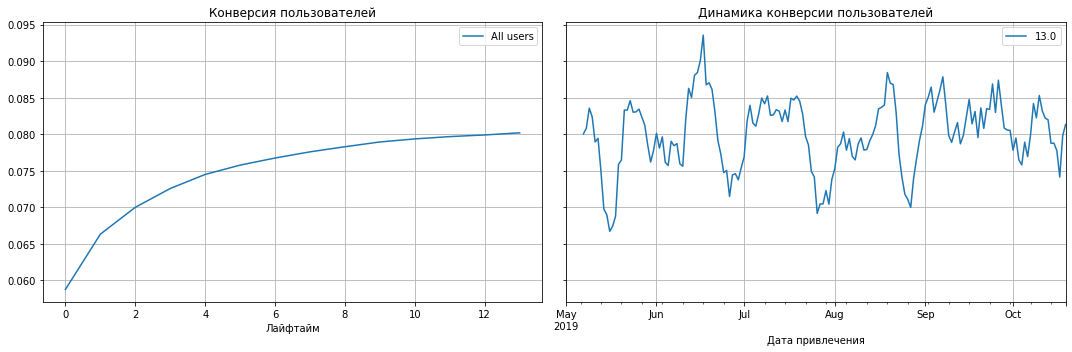

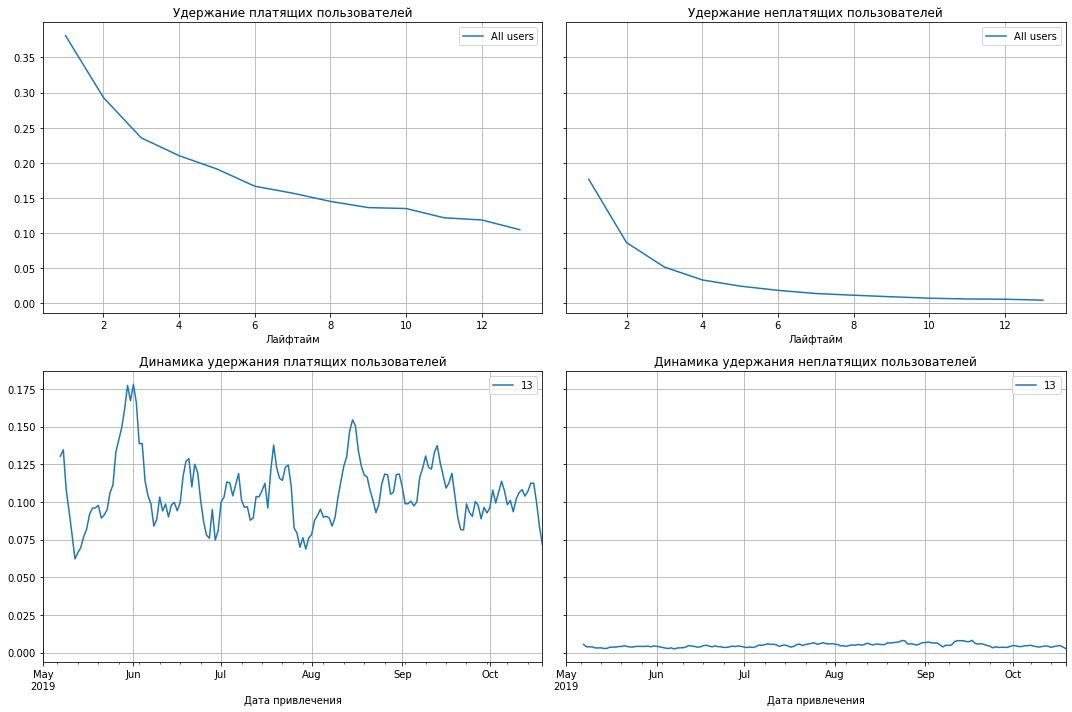

In [37]:
conversion_raw, conversion_grouped, conversion_history = get_conversion(profiles, order, observation_date, horizon_days)
plot_conversion(conversion_grouped, conversion_history, horizon_days)
retention_raw, retention_grouped, retention_history = get_retention(profiles, visit, observation_date, horizon_days)
plot_retention(retention_grouped, retention_history, horizon_days) 

Конверсия пользователей на протяжении лайфтайма растем,но так и не достигает результатов выше 0.08(достаточно низкие показатели). Мксимальные скачки по конверсии пользоватлей наблюдались в середине июля.
Удержание в платящей группе и неплатящей имеет тенденцию к падению,с более благоприятными показателями среди платной когорты.

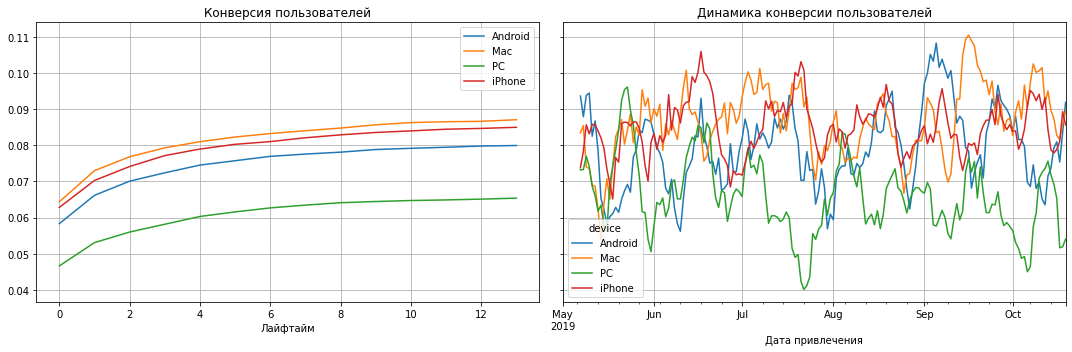

In [38]:
conversion_raw, conversion_grouped, conversion_history = get_conversion(profiles, 
                                                                        order, 
                                                                        observation_date, 
                                                                        horizon_days,
                                                                        ['device'])

plot_conversion(conversion_grouped, conversion_history, horizon_days)

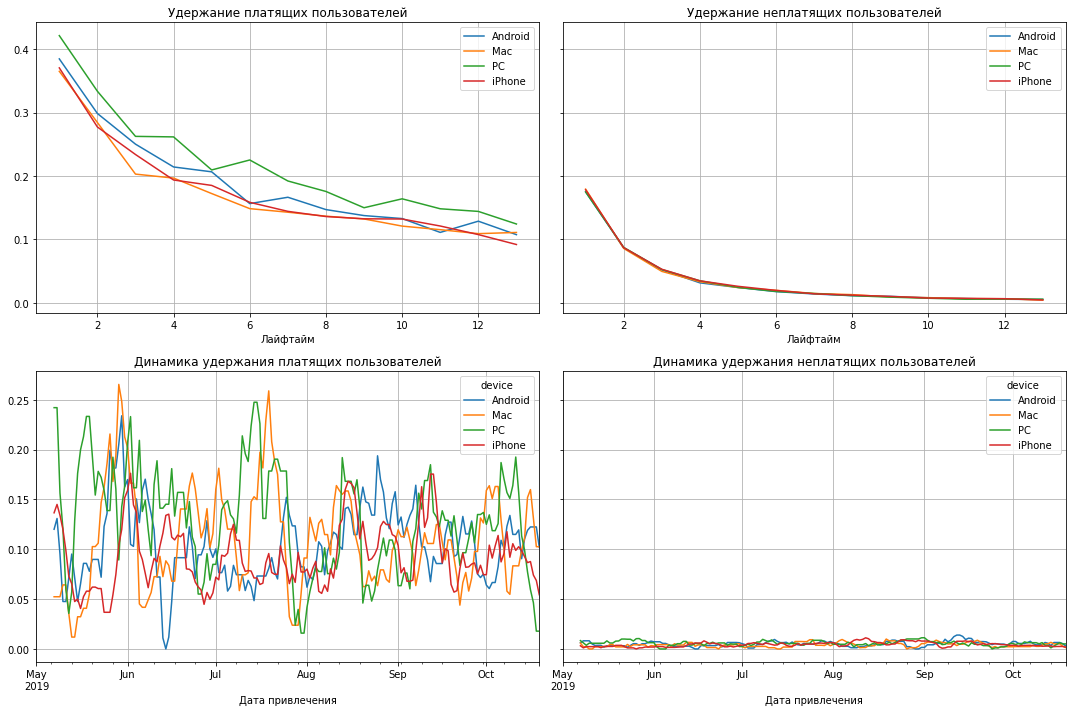

In [39]:
retention_raw, retention_grouped, retention_history = get_retention(profiles, 
                                                                    visit, 
                                                                    observation_date, 
                                                                    horizon_days, 
                                                                    ['device'])
plot_retention(retention_grouped, retention_history, horizon_days)

Максимальная конверсия для пользоватлей продукции корпорации Apple,в отличие от более низких показателей для PC и Android.
Удержание платящих пользователей в целом выше ,но имеет такую же тенденцию к снижениб(динамика сезонна).Динамика удержания неплатящих пользователей примерно одинаковая на всем периоде.

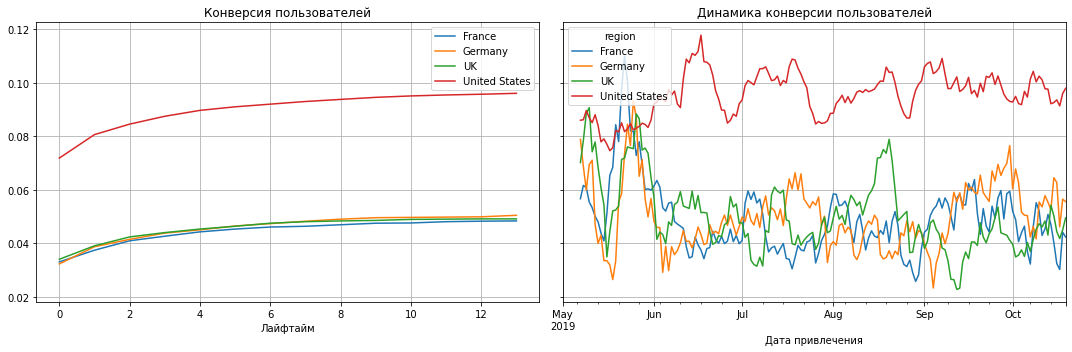

In [40]:
conversion_raw, conversion_grouped, conversion_history = get_conversion(profiles, 
                                                                        order, 
                                                                        observation_date, 
                                                                        horizon_days,
                                                                        ['region'])

plot_conversion(conversion_grouped, conversion_history, horizon_days)

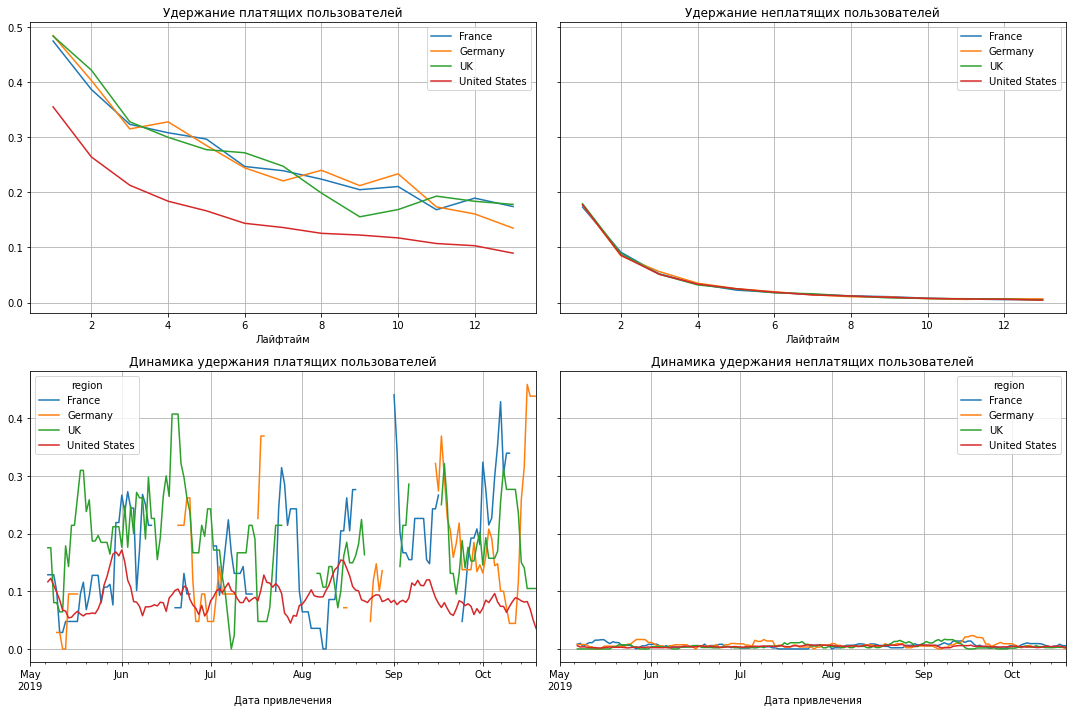

In [41]:
retention_raw, retention_grouped, retention_history = get_retention(profiles, 
                                                                    visit, 
                                                                    observation_date, 
                                                                    horizon_days, 
                                                                    ['region'])
plot_retention(retention_grouped, retention_history, horizon_days)

Конверсия для пользователей из США более чем в 2 раза выше ,чем для других регионов.
Удержание платящих пользователей из США самое низкое,а удержание для неплатящих держится во всех регионах на одном уровне.

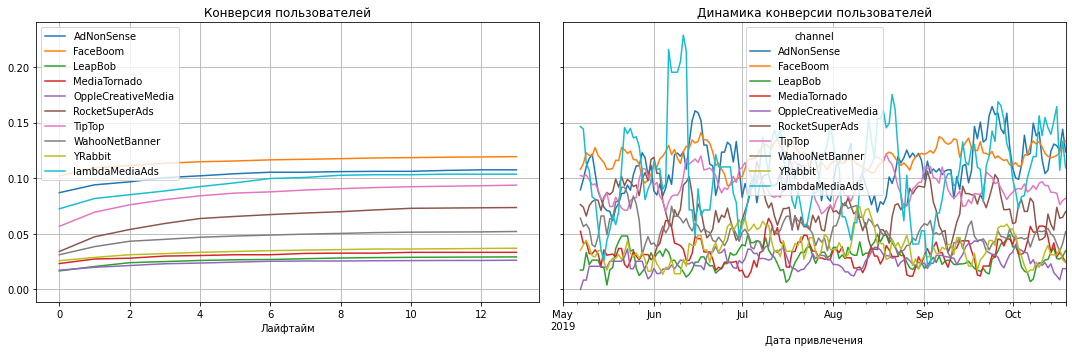

In [42]:
conversion_raw, conversion_grouped, conversion_history = get_conversion(profiles, 
                                                                        order, 
                                                                        observation_date, 
                                                                        horizon_days,
                                                                        ['channel'])

plot_conversion(conversion_grouped, conversion_history, horizon_days)

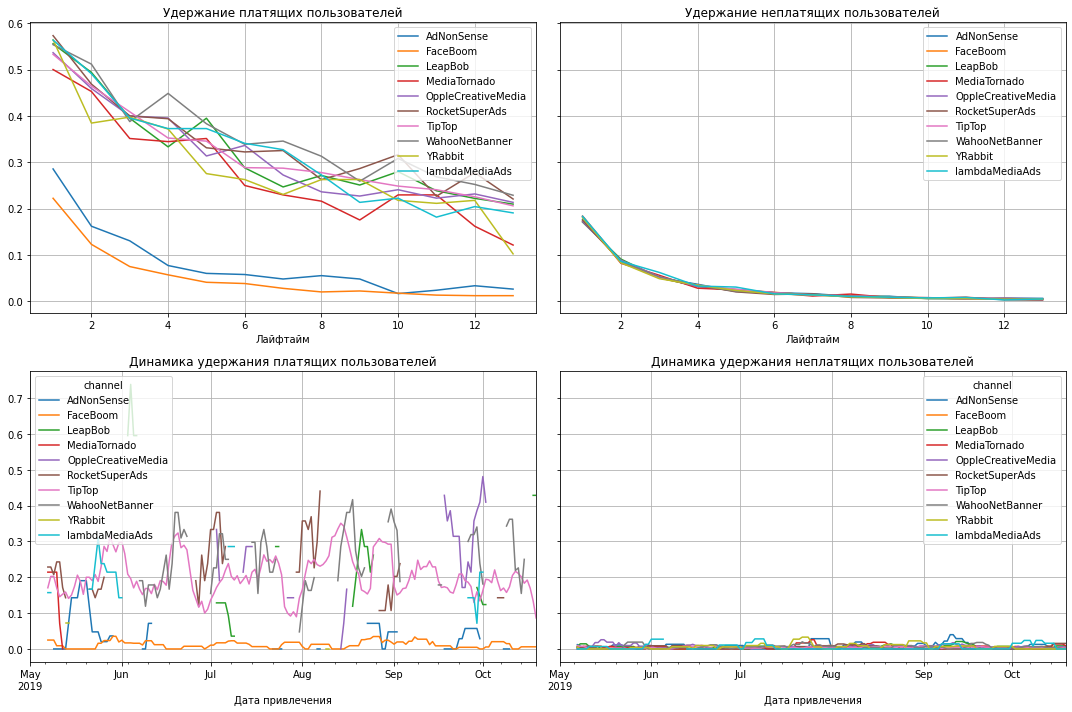

In [43]:
retention_raw, retention_grouped, retention_history = get_retention(profiles, 
                                                                    visit, 
                                                                    observation_date, 
                                                                    horizon_days, 
                                                                    ['channel'])
plot_retention(retention_grouped, retention_history, horizon_days)

Максимальная конверсия для пользователей каналов FaceBoom,AdNonSense,LambdaMediaAds. Притом динамика конверсии сезонна,с подъемами каждые два месяца.Удержание платящих пользователей из каналов AdNonSense,FaceBoom самое низкое.

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Комментарий ревьюера v_2: <a class="tocSkip"> </h2>
    
✅ По конверсии FaceBoom и AdNonSense лидируют, при этом по удержанию есть проблема "дырявого ведра", когда пользователи уходят из приложения в бóльших масштабах, чем ожидается. Новые пользователи, пришедшие из этих каналов, слабо конвертируются в постоянных клиентов. TipTop, отличающийся дорогой рекламой, по удержанию не выделяется на общем фоне. 
    
Качество аудитории в разных каналах различается. Может играть роль и фактор самого канала, в какой момент и как именно он цепляет внимание пользователя. Чтобы улучшить метрики в целом, важно развивать те каналы, которые позволяют эффективнее доносить ценность продукта. 

<div class="alert alert-block alert-danger" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Комментарий ревьюера v_1: <a class="tocSkip"></h2>
    
❌ Также необходимо проанализировать конверсию и удержание с разбивкой по устройствам, странам, рекламным каналам. Это важно, т.к. там мы можем найти ценную информацию.

<div style="background: #B0E0E6; padding: 5px; border: 1px solid SteelBlue; border-radius: 5px;">
    <font color='4682B4'><u><b>КОММЕНТАРИЙ СТУДЕНТА</b></u></font>
    <br />
    <font color='4682B4'>Подправил,добавил.</font>
</div>

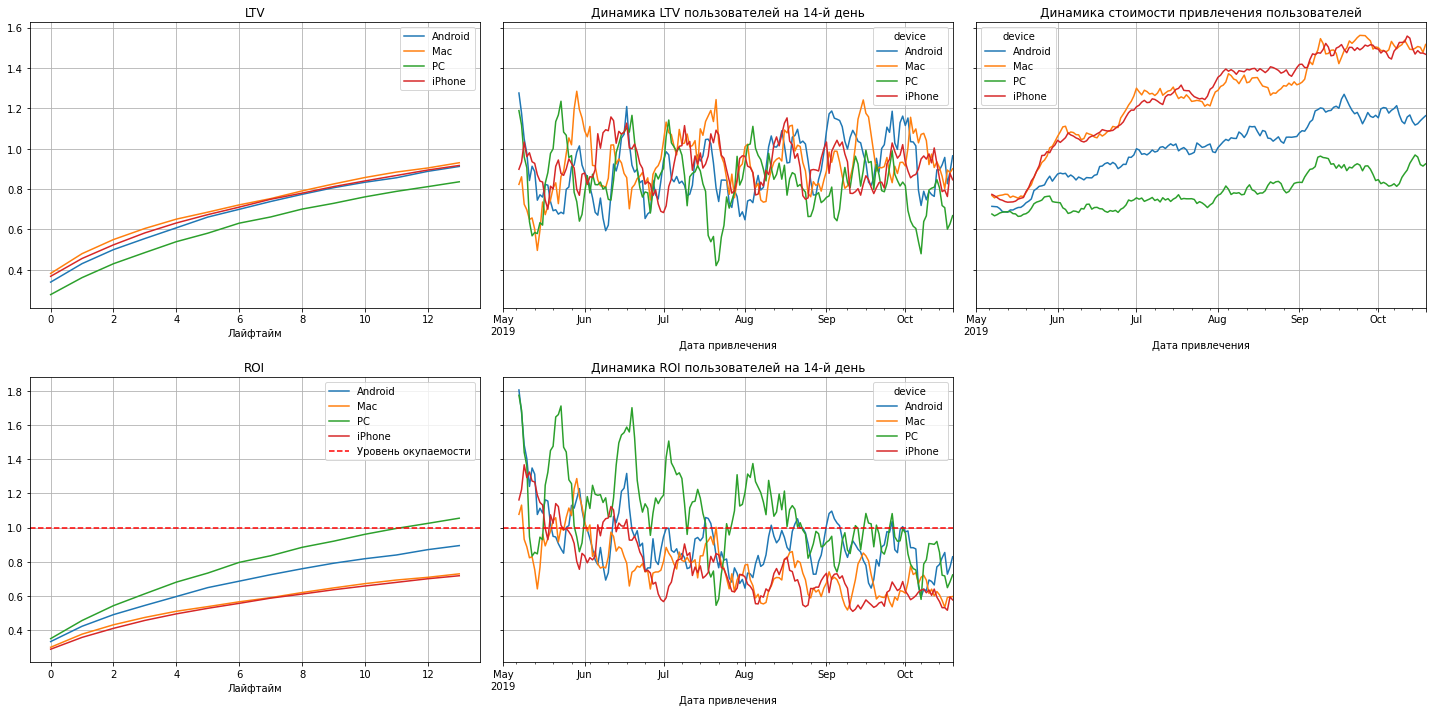

In [44]:
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(profiles, 
                                                                      order, 
                                                                      observation_date, horizon_days,['device'])
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days) 

Окупаемость пользователей на платформах компании Apple и Android так и не переходит через порог окупаемости  на протяжении всего лайфтайма. В целом самая окупаемая плафторма это персональные компьютеры. Стоимость привлечения для всех плавторма растёт, с лидирующими показателеми для пользователей на платформах iPhone,Mac.

<div class="alert alert-block alert-danger" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Комментарий ревьюера v_2: <a class="tocSkip"></h2>
    
❌ Как отличается LTV у устройств? Еще желательно написать, на какой день PC окупается. Как ведет себя динамика ROI пользователей на 14-й день? 
    

Минимальная LTV у персональных компьютеров,для остальных устройств держится на одном уровне. Вложенные средства на рекламу на персональных компбтерах наичнают окупаться только на 11 день. Динамика ROI практически обратно пропорциональна динамики стоимости привлечения пользователей: чем больше средств тратится на привлечение, тем труднее ей окупиться.

<div style="background: #B0E0E6; padding: 5px; border: 1px solid SteelBlue; border-radius: 5px;">
    <font color='4682B4'><u><b>КОММЕНТАРИЙ СТУДЕНТА</b></u></font>
    <br />
    <font color='4682B4'>Подправил,добавил.</font>
</div>

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Комментарий ревьюера v_3: <a class="tocSkip"> </h2>
    
✅ +

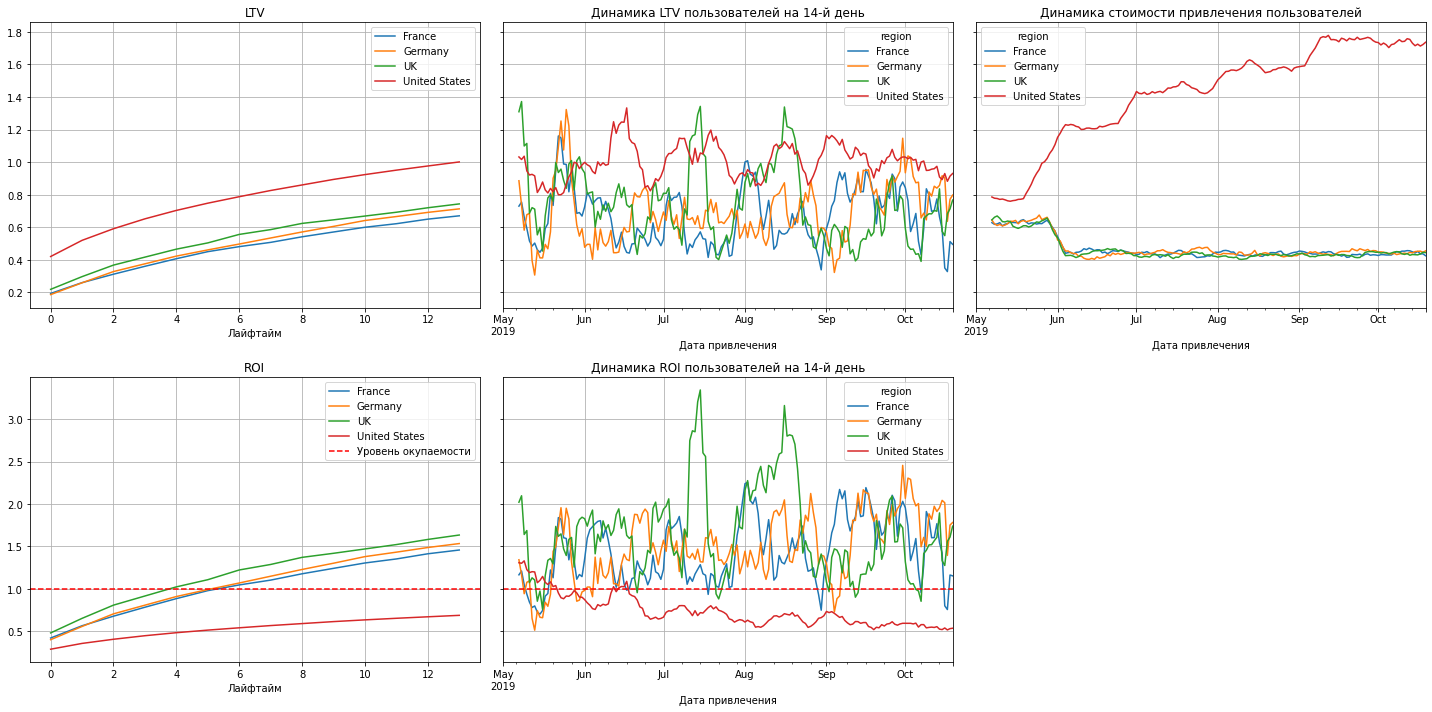

In [45]:
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(profiles, 
                                                                      order, 
                                                                      observation_date, horizon_days,['region'])
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days) 

Пользователи из США обходятся слишком дорого относительно остальных регионов. Траты на их привлечение растут с каждым месяцем,при том что в течение всего лайфтайма они так и не окупаются,в отличие от других стран.

Для пользователей из США также самый высокий LTV и его динамика.Для европейского региона держится на одном примерно уровне(с лидером Великобританией).Пользователи из европейских стран лкупаются уже на 4-5 день. В Великобритании в середине июля и августа наблюдаются большие скачки в динамике ROI,вероятнее всего это связано с периодом отпусков и успешной рекламой в данный период в этом регионе.


<div class="alert alert-block alert-danger" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Комментарий ревьюера v_2: <a class="tocSkip"></h2>
    
❌ Как отличается LTV? Также стоит обратить внимание на всплески у одной из стран на графике с динамикой ROI

<div style="background: #B0E0E6; padding: 5px; border: 1px solid SteelBlue; border-radius: 5px;">
    <font color='4682B4'><u><b>КОММЕНТАРИЙ СТУДЕНТА</b></u></font>
    <br />
    <font color='4682B4'>Подправил,добавил.</font>
</div>

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Комментарий ревьюера v_3: <a class="tocSkip"> </h2>
    
✅ Реклама не окупается только в США. И только в этой стране растет стоимость привлечения. При этом LTV - самый высокий среди представленных стран.

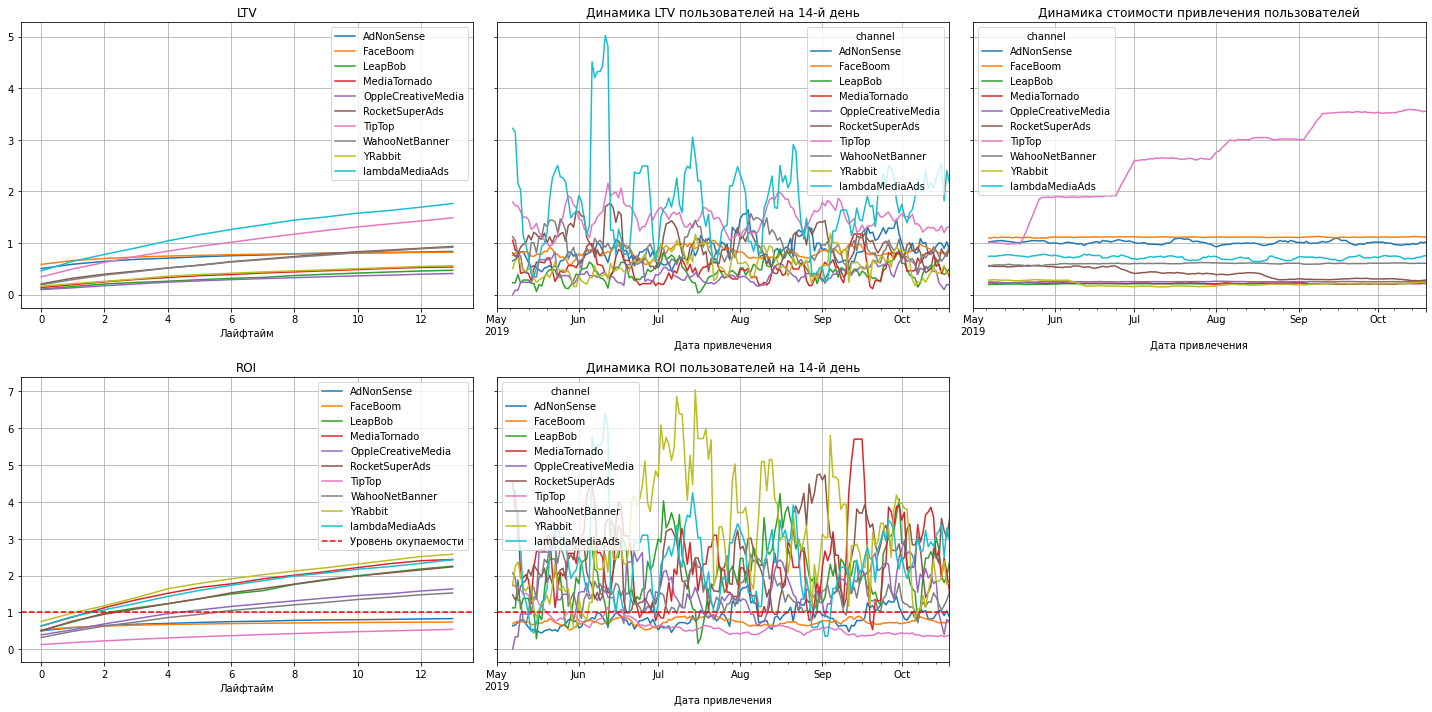

In [46]:
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(profiles, 
                                                                      order, 
                                                                      observation_date, horizon_days,['channel'])
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days) 

*Вывод:*
Стоимость привлечения пользоваталей через канал TipTop постоянно растёт,в отличие от остальных какналов рекламы.
ROI AdNonSense,FaceBoom,TipTop самое низкое,и за весь  лайфтайм пользователей так и не переходит через границу окупаемости.

- LTV растет медленно по всем источникам, лучше всего у `lambdaMediaAds`, `TipTop`; стабильно высокие - `AdNonSence`, `FaceBoom`;
- сильнее всего динамика ROI менялась у `YRabbit` с выраженными скачками с нчала июля по август, но к концу исследуемого периода стабилизируется в районе границы окупаемости. Самая низкая динамика ROI - `TipTop`.


Выводы по графикам конверсии и удержания:
по устройствам:
- пользователи Mac и iPhone конвертируются очень хорошо, причём постоянно. Хуже всего - PC.
- платящие пользователи стабильно плохо удерживаются, неплатящие - еще хуже.
по странам:
- конверсия пользователей из США самая высокая, причем она была выше всех на протяжении всего периода исследования, но удержание платящих пользователей самое низкое.
по каналам:
- самое плохое удержание - удержание платящих пользователей по каналам `Faceboom` . При этом по `Faceboom` самая высокая конверсия.

<div class="alert alert-block alert-danger" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Комментарий ревьюера v_2: <a class="tocSkip"></h2>
    
❌  Что можно сказать про LTV? Есть ли какой-либо необычный всплеск на графике с динамикой ROI?

<div class="alert alert-warning" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Комментарий ревьюера v_1: <a class="tocSkip"> </h2>
    
⚠️ Также можно провести дополнительный анализ окупаемости рекламы с разбивкой по рекламным каналам для США и отдельно для европейских стран.
    
В частности, можно ответить на вопрос, куда лучше перенаправить рекламный бюджет в США. Какой источник показывает неплохую конверсию, хороший ROI и высокое удержание платящих пользователей на американском рынке?


<div style="background: #B0E0E6; padding: 5px; border: 1px solid SteelBlue; border-radius: 5px;">
    <font color='4682B4'><u><b>КОММЕНТАРИЙ СТУДЕНТА v_2</b></u></font>
    <br />
    <font color='4682B4'>Добавил.</font>
</div>

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Комментарий ревьюера v_3: <a class="tocSkip"> </h2>
    
✅ +

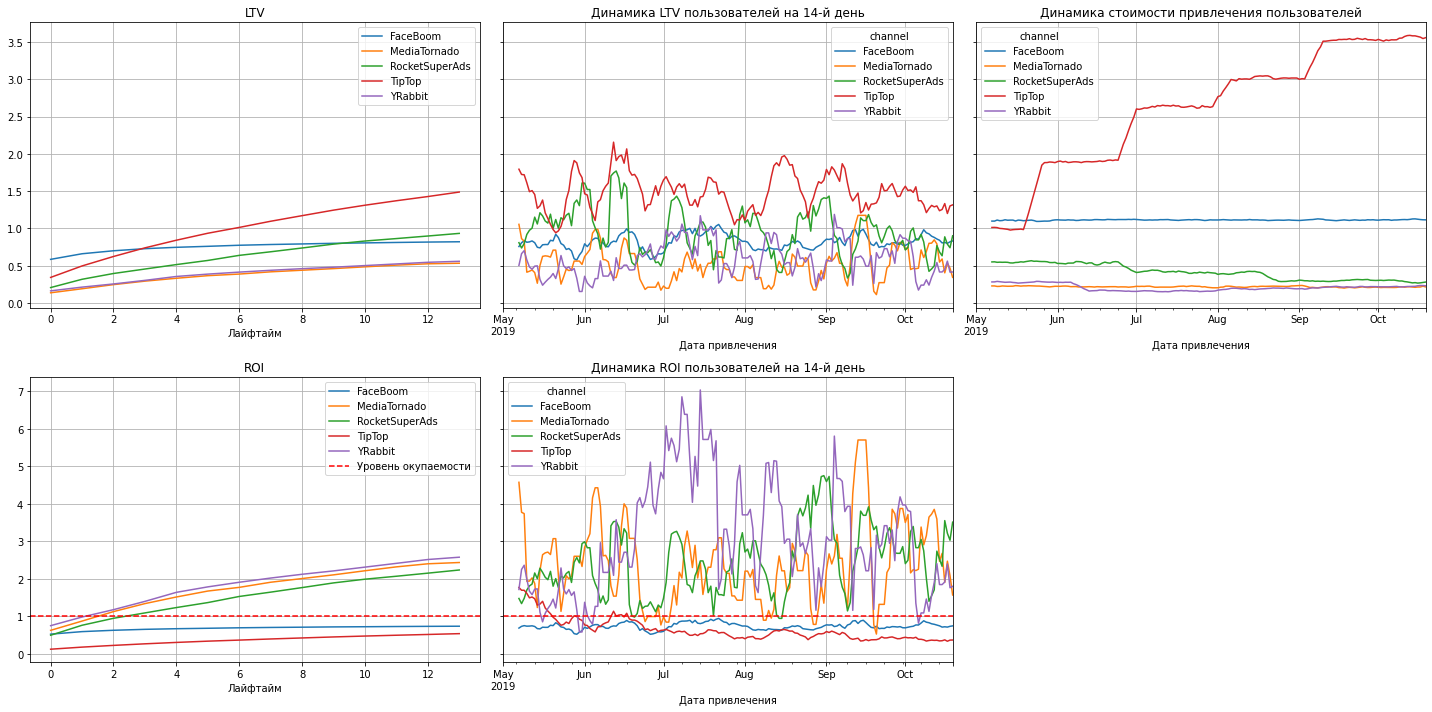

In [47]:
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(profiles.query('region == "United States"'), 
                                                                      order, 
                                                                      observation_date, horizon_days,['channel'])
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days) 

Самыми убыточными для региона США являются каналы TipTop и FaceBoom- за весь периолд они так и не окупаются,а стоимость привлечения для канала TipTopне только растёт ,но и превышает все остальные каналы вместе взятые

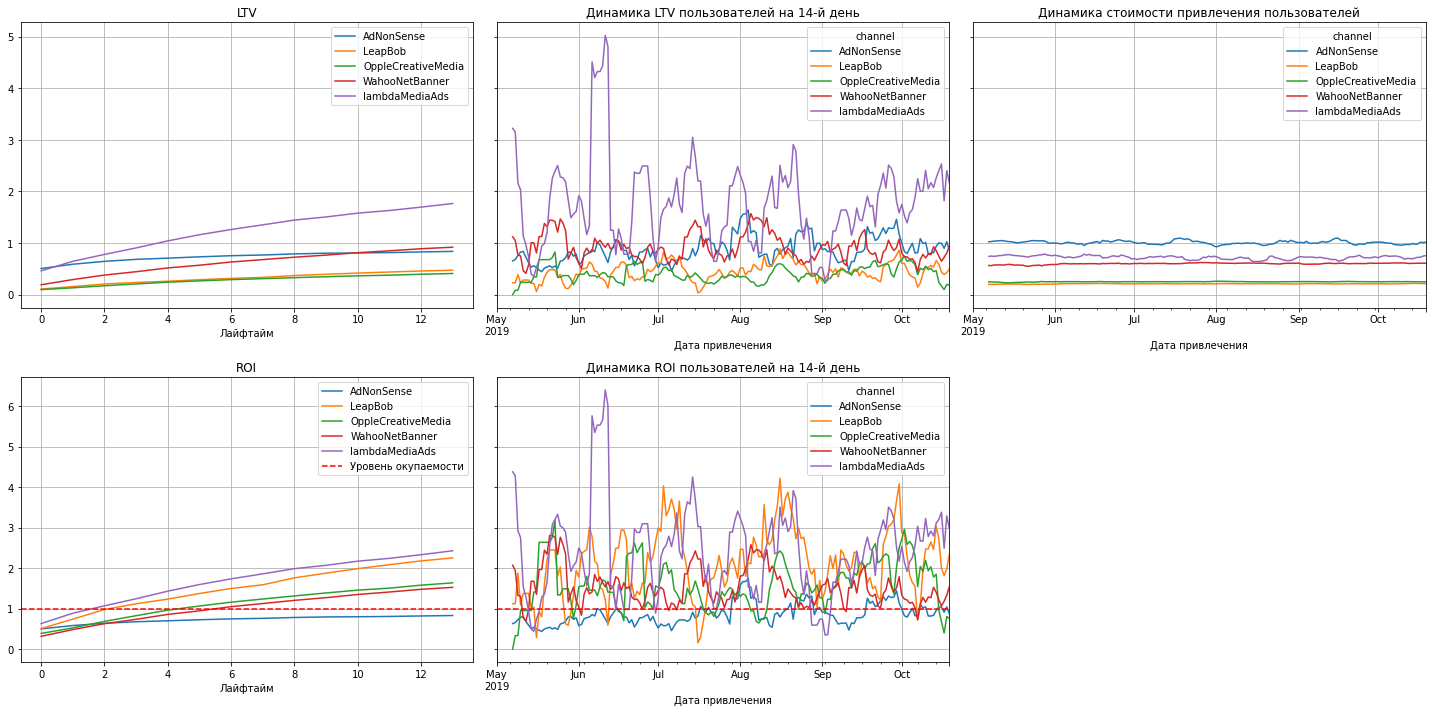

In [48]:
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(profiles.query('region != "United States"'), 
                                                                      order, 
                                                                      observation_date, horizon_days,['channel'])
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days) 

Для европейского региона неокупаем AdNonSense, с самыми лучшими показателями для канала LambdaMediaAds.


1. Из регионов-США снижает окупаемость рекламы. Из каналов: TipTop, FaceBoom, AdNonSense. Хуже всего окупаются пользователи устройств IPhone и MAC
2. Проблемы с окупаемостью вызваны неправильным распределением средств на привлечение с каналов и регионов,так же таргетированность на не те устройства.
3. TipTop самый невыгодный канал для привлечения. Также стоит обратить внимание на каналы откуда привлекаются платящие пользователи PC, потому что они окупаются лучше всего.

### Выводы

Выделите причины неэффективности привлечения пользователей.

3 источника рекламы ,которые являются убыльными это: AdNonSense, FaceBoom, TipTop. Основными неокупаемыми пользователямиявляются жители США. ROI по странам в динамике показал, что с каждым месяцем привлеченные пользователи из США всё хуже окупались, но динамика стоимости привлечения этих пользователей только наращивалась.
Выводы по графикам конверсии и удержания:

по устройствам:

- пользователи Mac и iPhone конвертируются очень хорошо, причём постоянно. Хуже всего - PC.
- платящие пользователи стабильно плохо удерживаются, неплатящие - еще хуже.
по странам:
- конверсия пользователей из США самая высокая, причем она была выше всех на протяжении всего периода исследования, но удержание платящих пользователей самое низкое.
по каналам:
- самое плохое удержание - удержание платящих пользователей по каналам `Faceboom` . При этом по `Faceboom` самая высокая конверсия.


Возможные причины, связанные с проблемой рекламы в США:

* Региональные события могли повлять на клиентоориентированность пользоватлей из США,из-за чего реклама была неэффективна.
* Из-за просадки в окупаемости для пользоватлей устройств apple можно сделать вывод ,что возможно есть проблема с оптимизацией приложения Procrastinate Pro+ для данных устройств.
* Рекламная система TipTop(учитывая самые высокие затраты),FaceBoom(учитывая низкие показатели удержания) оказались убыточными. Дальнейшие вложения в данные каналы будут неэффективны.

Сформулируйте рекомендации для отдела маркетинга.

* Нужно искать новые каналы для привлечения пользователей из Великобритании,Франции и Германии.
* Привлекать больше пользователей персональных компьютеров и пользователей устройств на системе Android.
* Нужно увеличить финансирование на 3 канала с наивысшим ROI: Yrabbit, MediaTornado(невсокие показатели LTV и конверсии), RocketSuperAds(в том числе с высокими показателями конверсии) для США и lambdaMediaAds(в том числе с высокими показателями конверсии),LeapBob(невсокие показатели LTV и конверсии) для европейского региона.

<div class="alert alert-block alert-danger" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Комментарий ревьюера v_1: <a class="tocSkip"></h2>
    
❌ Вывод нужно будет перепроверить после удаления "органиков" и дополнить после анализа конверсии и удержания. В частности, какое удержание у FaceBoom?  Стоит ли предлагать отделу маркетинга отказаться и от этого канала?
    
"Нужно увеличить финансирование на 3 канала с наивысшим ROI: Yrabbit, MediaTornado, lambdaMediaAds" - стоит их подробнее разобрать, какие еще результаты показали эти каналы, что показывают метрики по сравнению с другими каналами? Что можно сказать про RocketSuperAds, какие у него результаты?

<div style="background: #B0E0E6; padding: 5px; border: 1px solid SteelBlue; border-radius: 5px;">
    <font color='4682B4'><u><b>КОММЕНТАРИЙ СТУДЕНТА V_2</b></u></font>
    <br />
    <font color='4682B4'>Подправил-добавил.</font>
</div>

<div class="alert alert-warning" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Комментарий ревьюера v_2: <a class="tocSkip"> </h2>
    
⚠️ RocketSuperAds по совокупности факторов является наиболее сбалансированным каналом. Какой LTV и конверсия у LeapBob и MediaTornado?

<div style="border:solid lightblue 3px; background:#f7faf8; padding: 20px">
<span style="color:darkblue">Общий вывод по проекту v_1:</span>
    
У тебя хорошая работа! Выполнено большинство ключевых этапов. Но есть замечания, которые необходимо доработать:
* добавить вступление
* прокомментировать визуализации динамики изменения расходов во времени по неделям и месяцам
* отфильтровать органических пользователей
* пересмотреть выводы в разделе "Оцените окупаемость рекламы" после фильтрации данных
* проанализировать конверсию и удержание с разбивкой по устройствам, странам, рекламным каналам
* обновить и дополнить итоговый вывод
   
Также добавил рекомендации по улучшению проекта. Жду проект)

<div style="border:solid lightblue 3px; background:#f7faf8; padding: 20px">
<span style="color:darkblue">Общий вывод по проекту v_2:</span>
    
Доработать:
* дополнить выводы в разделе "Оцените окупаемость рекламы" 

Жду проект)

<div style="border:solid lightblue 3px; background:#f7faf8; padding: 20px">
<span style="color:darkblue">Общий вывод по проекту v_3:</span>

Спасибо за доработанные замечания! Проект принят. 
    
Дополнительно можно почитать о метриках продукта и метриках роста по [ссылке](https://gopractice.ru/product/cohort_analysis/)
    
В [этой](https://smysl.io/blog/pandas-cohorts/) статье разбирается код для построения когорт.
    
Успехов в дальнейшем обучении!)